## 1. Problem Statement:

Given candy's data w.r.t. competitors and their Halloween candy's type/feature, we have to create a model to predict the winning percentage of the candy.

## 2. Data Description

The candy dataset shows Halloween candy from competitors with their candy's detail by following type/feature:

1: Columns: chocolate,	fruity,	caramel,	peanutyalmondy,	nougat,	crispedricewafer,	hard,	bar,	pluribus are categorical. A single candy can have combination of different columns.

2: Columns: sugarpercent,	pricepercent,	winpercent are continuous in data values.

3: Columns: winpercent is continuous in data values.
    
So we have __winpercent__ as TARGET variable and rest as explanatory variable.


__Importing Packages__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

__Importing the Dataset__

In [2]:
import html

data = pd.read_csv('https://raw.githubusercontent.com/prashant-rocks/Data-Science/master/Machine%20Learning/Regression-Model-Candy-Dataset/src/data/candy-data.csv')
#competitor data have special character so remove that
data['competitorname'] = html.unescape(data['competitorname'])
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## 3. Exploratory Data Analysis

In [67]:
data.shape

(85, 13)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [69]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [70]:
#But we see competitor's name is an identity column and not decisive in target prediction - remove it
data.drop("competitorname" , axis=1, inplace=True)

__Distribution of Features__

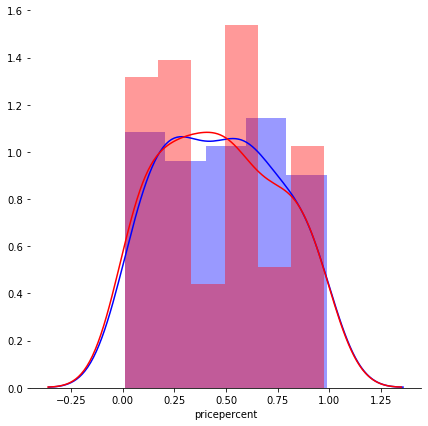

In [71]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data.sugarpercent, color="b")

sns.distplot(data.pricepercent, color="r")


__Visualize the relationship between the features and the response using scatter plots__

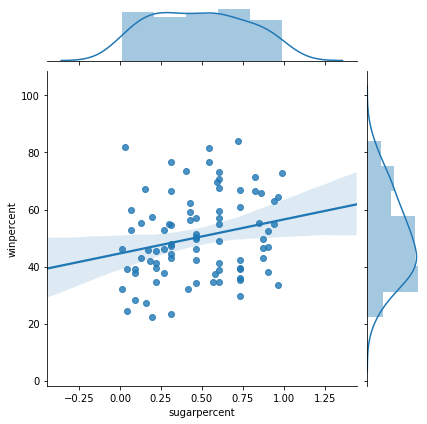

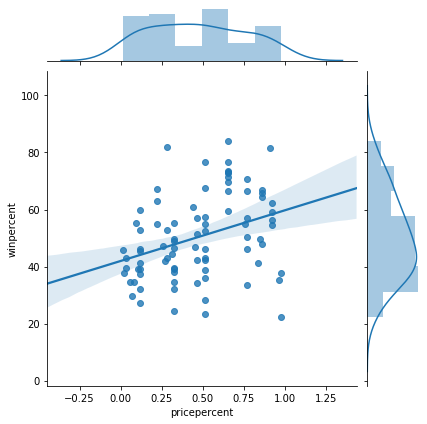

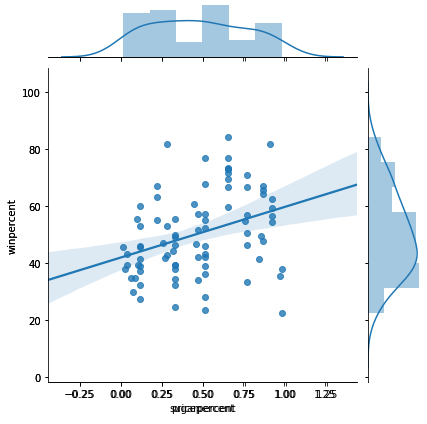

In [72]:
JG1 = sns.jointplot("sugarpercent", "winpercent", data=data, kind='reg')
JG2 = sns.jointplot("pricepercent", "winpercent", data=data, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

__Visualising Pairwise correlation__

D:\DOC\Learning\anaconda_new\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


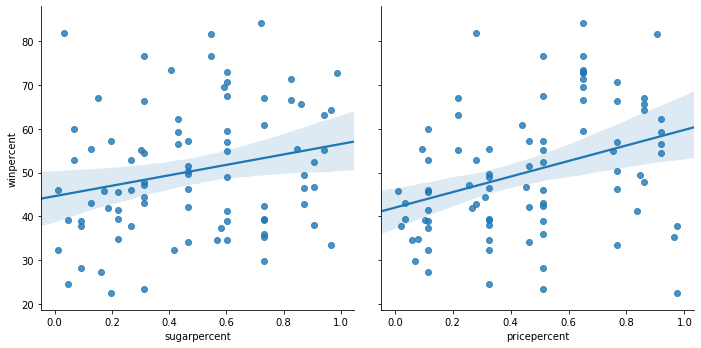

In [73]:
sns.pairplot(data, x_vars=['sugarpercent', 'pricepercent'], y_vars='winpercent', size=5, aspect=1, kind='reg')

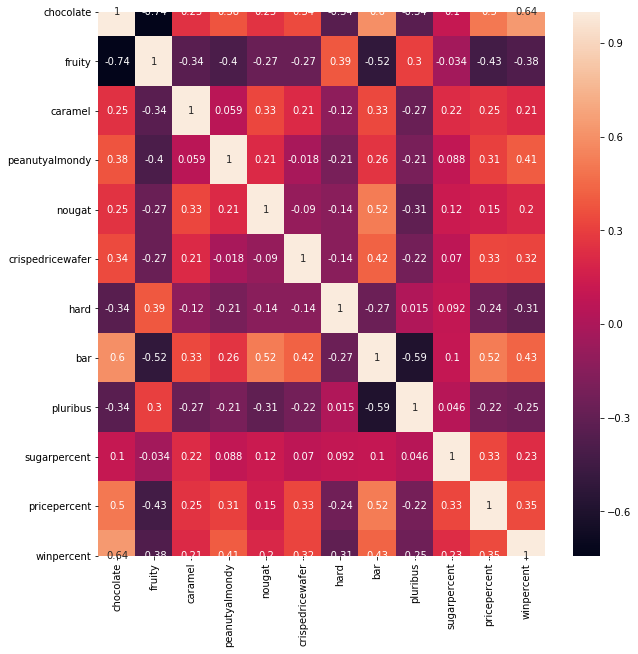

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap( data.corr(), annot=True );

## Prepare X and y using Pandas

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)

In [76]:
data = pd.DataFrame(data1)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.138990,-0.899172,2.251983,-0.444053,-0.299572,3.338092,-0.46291,1.745743,-1.03594,0.901261,1.376914,1.138603
1,1.138990,-0.899172,-0.444053,-0.444053,3.338092,-0.299572,-0.46291,1.745743,-1.03594,0.445922,0.148273,1.181755
2,-0.877971,-0.899172,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,-1.663576,-1.242308,-1.234361
3,-0.877971,-0.899172,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,-1.663576,0.148273,-0.287147
4,-0.877971,1.112134,-0.444053,-0.444053,-0.299572,-0.299572,-0.46291,-0.572822,-1.03594,1.520236,0.148273,0.138417


In [77]:
# create a Python list of feature names and target var
data.columns = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent','winpercent']
feature_cols = ['chocolate', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus','sugarpercent', 'pricepercent']
X = data[feature_cols] 
y = data.winpercent

__Splitting X and y into training and test datasets__

In [78]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.30, random_state=1)

In [79]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (59, 10)
y_train shape:  (59,)

Test cases as below
X_test shape:  (26, 10)
y_test shape:  (26,)


__Define linear regression__

In [80]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)

    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

__Define Decision Tree Regression__

In [81]:
def DTRegression(X, y):
    
    X_train, X_test, y_train, y_test = split(X,y)    
    
    from sklearn.tree import DecisionTreeRegressor
    linreg = DecisionTreeRegressor()
    linreg.fit(X_train, y_train)

    return linreg    

__Linear Regression Model without GridSearcCV and Decision Tree Regression__

Note: Linear Regression Model with GridSearcCV is implemented at Table of Contents: 8

In [82]:
X = data[feature_cols]  
y = data.winpercent
model_linreg = linear_reg(X,y)
model_DTRegression = DTRegression(X, y)


__Interpreting Model Coefficients__

In [83]:
print('linreg Intercept:',model_linreg.intercept_)          # print the intercept 
print('linreg Coefficients:',model_linreg.coef_)  

linreg Intercept: -0.08947800762046128
linreg Coefficients: [ 0.48902551 -0.21007433  0.18959267  0.17494462  0.26879278 -0.11916083
 -0.15348895 -0.1387128   0.3024778  -0.04532557]


__Using the Model for Prediction__

In [84]:
#Prediction with Linear Reg
y_pred_train_linear = model_linreg.predict(X_train)
y_pred_test_linear = model_linreg.predict(X_test)                                                           

#Prediction with DT Regression
y_pred_train_DTReg = model_DTRegression.predict(X_train)
y_pred_test_DTReg = model_DTRegression.predict(X_test)                                                           

__Model Evaluation using metrics__

In [85]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_linear))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_linear))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

###For DT Regression###
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_DTReg))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_DTReg))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))


RMSE for training set is 0.6363540473969078
RMSE for test set is 0.9573717506788896
RMSE for training set is 0.11565840886326724
RMSE for test set is 0.8443787174157567


In [86]:
from sklearn.metrics import r2_score as rr
#r2 for linear regression
r2_score = rr( y_test, y_pred_test_linear)
print(r2_score)

#r2 for DT Regression
r2_score = rr( y_test, y_pred_test_DTReg)
print(r2_score)

0.09813186845147626
0.2984536319263321


__Observation__

By implementing 2 algos( __Linear Regression__ and __Descision Tree Regression__ ) , we got to know that DT Regression is
suiting the scenario well and so we will go with the same.